# <u> Bike Rentals Case Study:</u>
</br>
<b>
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.
The company wants to know :

*     Which variables are significant in predicting the demands for shred bikes.
*     How well those variables describe the bike demands.
</b>

### Bike Rentals -- Used Multiple Linear Regression using RFE Method

In [369]:
# importing all required Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Check for statistical data
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step - 1  Reading and Analyzing Data

In [370]:
# Reading a CSV file
daysData = pd.read_csv('day.csv')

In [371]:
# viewing data
daysData.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [372]:
# studying shape of data
daysData.shape

(730, 16)

In [373]:
# studying mean , median information of data
daysData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [374]:
# studying dtypes of data
daysData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [375]:
# studying size of data
daysData.size

11680

In [376]:
# studying length of data
len(daysData)

730

In [377]:
# studying columns 
daysData.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Step 2 Data Visualization

For Visualizing data we have to convert some variables to string with their specific value.Then only we can do EDA on data.
As this data is ready for model prediction.

In [378]:
# Mapping values of - season : season (1:spring, 2:summer, 3:fall, 4:winter)
daysData['season'] = daysData['season'].map({1 : 'spring' , 2: 'summer' , 3 : 'fall' ,4 :'winter'})

In [379]:
# Checking different values's sum 
daysData['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [380]:
# Mapping values of 	- yr : year (0: 2018, 1:2019)
daysData['yr'] = daysData['yr'].map({0 : '2018' , 1 : '2019'})

In [381]:
# Checking different values's sum
daysData['yr'].value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [382]:
# Mapping values of - mnth : month ( 1 to 12)
daysData['mnth'] = daysData['mnth'].map({1 : 'January' , 2 : 'Febuary',3 : 'March' , 4 : 'April',5 : 'May' , 6 : 'June',7 : 'July' , 8 : 'August',9 : 'September' , 10 : 'October',11 : 'November' , 12 : 'December'})

In [383]:
# Checking different values's sum
daysData['mnth'].value_counts()

January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
Febuary      56
Name: mnth, dtype: int64

In [384]:
# Mapping values of - weekday : day of the week
daysData['weekday'] = daysData['weekday'].map({1 : 'Monday' , 2 : 'Tuesday', 3 : 'Wenesday', 4 : 'Thrusday', 5 : 'Friday', 6 : 'Saturday', 0 : 'Sunday'})

In [385]:
# Checking different values's sum
daysData['weekday'].value_counts()

Monday      105
Tuesday     105
Wenesday    104
Thrusday    104
Friday      104
Saturday    104
Sunday      104
Name: weekday, dtype: int64

In [386]:
# Mapping values of -- holiday : weather day is a holiday or not
daysData['holiday'] = daysData['holiday'].map({0 : 'No' , 1 : 'Yes'})

In [387]:
# Checking different values's sum
daysData['holiday'].value_counts()

No     709
Yes     21
Name: holiday, dtype: int64

In [388]:
# Mapping values of -- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
daysData['workingday'] = daysData['workingday'].map({1 : 'Working Day' , 0 : 'Not Working Day'})

In [389]:
# Checking different values's sum
daysData['workingday'].value_counts()

Working Day        504
Not Working Day    226
Name: workingday, dtype: int64

In [390]:
# Mapping values of -+ weathersit : 
# 		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

daysData['weathersit'] = daysData['weathersit'].map({1 : 'Clear, Few clouds, Partly cloudy, Partly cloudy' , 
                                                     2 : 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                                     3 : 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                                                     4 : 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

In [391]:
# Checking different values's sum
daysData['weathersit'].value_counts()

Clear, Few clouds, Partly cloudy, Partly cloudy                                            463
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               246
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     21
Name: weathersit, dtype: int64

In [392]:
# Checking datatype of each variable
daysData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


In [393]:
# For better readiability we Correct the variable names
daysData = daysData.rename(columns={'dteday':'date','yr':'year', 'mnth':'month','temp':'temperature','atemp' :'feeling_temperature','hum':'humidity', 'cnt': 'counts'})
daysData.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,counts
0,1,01-01-2018,spring,2018,January,No,Monday,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,January,No,Tuesday,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,January,No,Wenesday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,January,No,Thrusday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,January,No,Friday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [394]:
daysData.shape

(730, 16)

<h2>2.1 Numerical Data Analysis </h2>

<H3> <U> 2.1.1. UNIVARIATE ANALYSIS </U></H3>

<H3> <U> Temperature </U></H3>

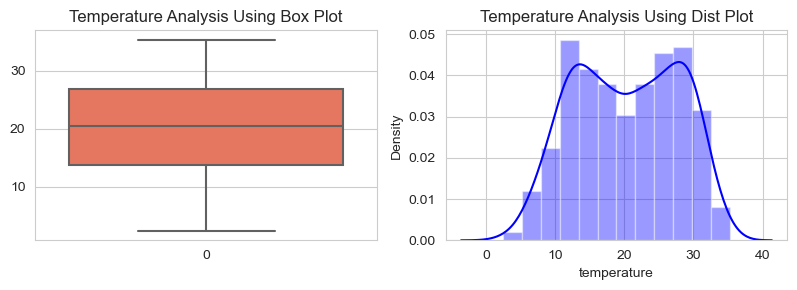

In [395]:
# Temperature Analysis

plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('Temperature Analysis Using Box Plot')
sns.boxplot(daysData.temperature , palette = 'Reds')

plt.subplot(2,3,2)
plt.title('Temperature Analysis Using Dist Plot')
sns.distplot(daysData.temperature , color = 'b')
plt.show()


In [396]:
daysData['temperature'].describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temperature, dtype: float64

<H4>Insight On Temperature Variable</H4>
We can that see that temperature is having a min of <b> 2.42 Celcius </b> and max of <b> 35.3 Celcius </b> and having a median at <b> 20.13 Celcius </b>

<H3> <U> Feeling Temperature </U></H3>

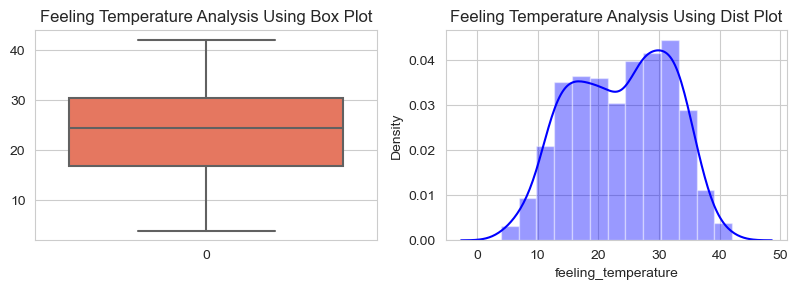

In [397]:
# Feeling Temperature Analysis 

plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('Feeling Temperature Analysis Using Box Plot')
sns.boxplot(daysData.feeling_temperature , palette = 'Reds')

plt.subplot(2,3,2)
plt.title('Feeling Temperature Analysis Using Dist Plot')
sns.distplot(daysData.feeling_temperature , color = 'b')
plt.show()

In [398]:
daysData['feeling_temperature'].describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: feeling_temperature, dtype: float64

<H4>Insight On Feeling Temperature Variable</H4>
We can that see that feeling temperature is having a min of <b> 3.96 Celcius </b> and max of <b> 42.04 Celcius </b> and having a median at <b> 23.72 Celcius </b>

<H3> <U> HUMIDITY </U></H3>

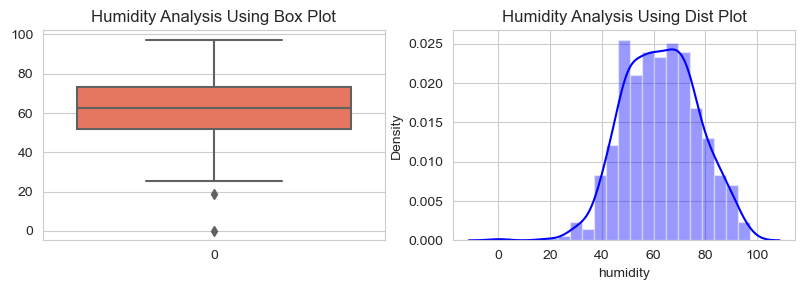

In [399]:
# Humidity Analysis 

plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('Humidity Analysis Using Box Plot')
sns.boxplot(daysData.humidity , palette = 'Reds')

plt.subplot(2,3,2)
plt.title('Humidity Analysis Using Dist Plot')
sns.distplot(daysData.humidity , color = 'b')
plt.show()

In [400]:
daysData['humidity'].describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: humidity, dtype: float64

<H4> As we can see that there is a outlier present .So we have treat the outliers using IQR quantile range.

In [401]:
# checking for quantile .5 percentage
r = daysData['humidity'].quantile(0.005)

In [402]:
# now checking for values less than r
(daysData['humidity']<r).sum()

4

In [403]:
# quantitle value substitution 
daysData['humidity'] = daysData['humidity'].apply(lambda x : r if x<=r else x)

In [404]:
# Checking humidity
daysData['humidity'].describe()

count    730.000000
mean      62.822978
std       14.052800
min       28.497072
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: humidity, dtype: float64

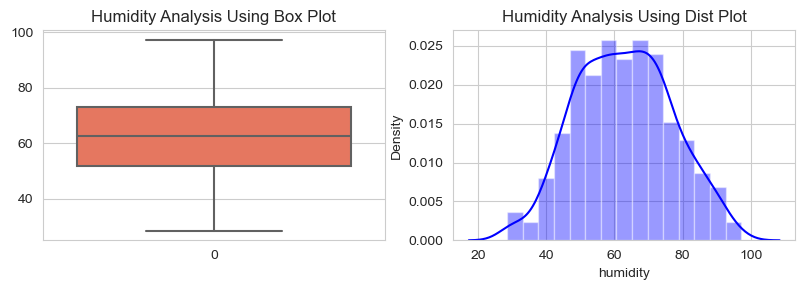

In [405]:
# Humidity Analysis After Outlier Treatment

plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('Humidity Analysis Using Box Plot')
sns.boxplot(daysData.humidity , palette = 'Reds')

plt.subplot(2,3,2)
plt.title('Humidity Analysis Using Dist Plot')
sns.distplot(daysData.humidity , color = 'b')
plt.show()

<H4>Insight On Humidity Variable</H4>
We can that see that humidity is having a min of <b> 28.49 </b> and max of <b> 97.25 </b> and having a median at <b> 62.82 </b>

<H3> <U> Windspeed </U></H3>

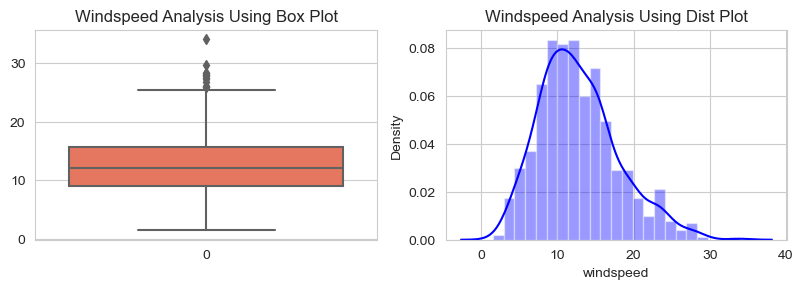

In [406]:
# Windspeed Analysis 

plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('Windspeed Analysis Using Box Plot')
sns.boxplot(daysData.windspeed , palette = 'Reds')

plt.subplot(2,3,2)
plt.title('Windspeed Analysis Using Dist Plot')
sns.distplot(daysData.windspeed , color = 'b')
plt.show()

In [407]:
daysData['windspeed'].describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

<H4> As we can see that there is a outlier present .So we have treat the outliers using IQR quantile range.

In [408]:
r = daysData['windspeed'].quantile(0.98)

In [409]:
# count the no of values
(daysData['windspeed']>= r).sum()

15

In [410]:
daysData['windspeed'] = daysData['windspeed'].apply(lambda x : r if x >= r else x)

In [411]:
daysData['windspeed'].describe()

count    730.000000
mean      12.715074
std        5.057614
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       25.201627
Name: windspeed, dtype: float64

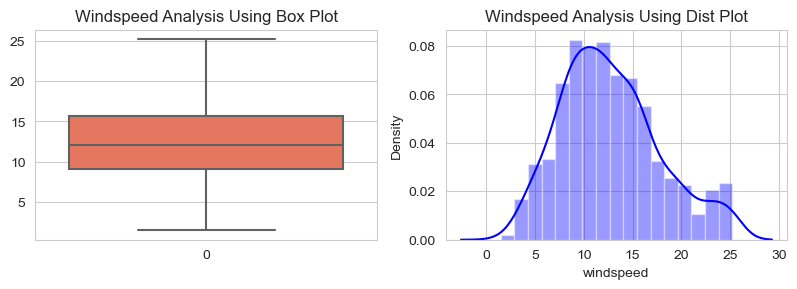

In [412]:
# Windspeed Analysis After Outlier Treatment

plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('Windspeed Analysis Using Box Plot')
sns.boxplot(daysData.windspeed , palette = 'Reds')

plt.subplot(2,3,2)
plt.title('Windspeed Analysis Using Dist Plot')
sns.distplot(daysData.windspeed , color = 'b')
plt.show()

<H4>Insight On Windspeed Variable</H4>
We can that see that windspeed is having a min of <b> 1.6 </b> and max of <b> 25.2 .</b> and having a median at <b> 12.71</b>Most of the time, windspeed lies between <b> 9 to 15.</b>

<H3> <U> Casual Users </U></H3>

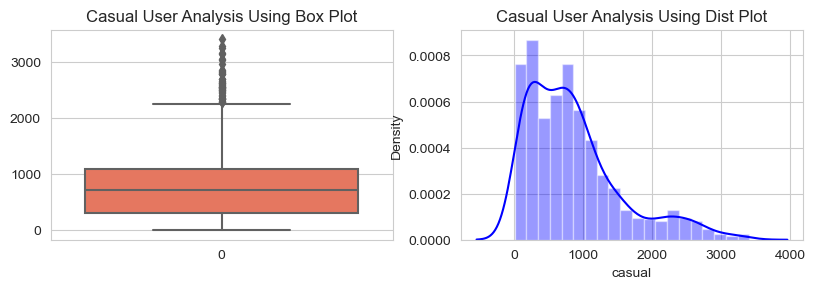

In [413]:
# Casual Analysis 

plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('Casual User Analysis Using Box Plot')
sns.boxplot(daysData.casual , palette = 'Reds')

plt.subplot(2,3,2)
plt.title('Casual User Analysis Using Dist Plot')
sns.distplot(daysData.casual , color = 'b')
plt.show()

In [414]:
daysData['casual'].describe()

count     730.000000
mean      849.249315
std       686.479875
min         2.000000
25%       316.250000
50%       717.000000
75%      1096.500000
max      3410.000000
Name: casual, dtype: float64

<H3> <U> Registered Users </U></H3>

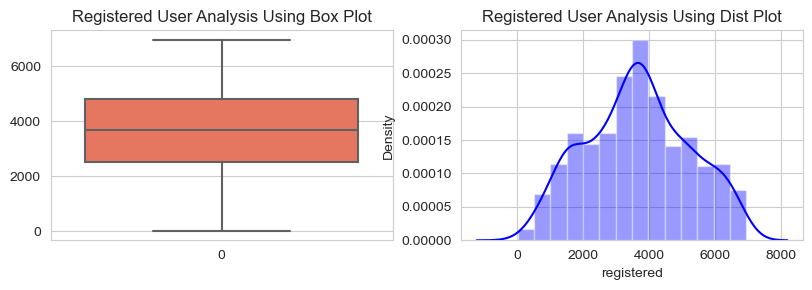

In [415]:
# Registered user Analysis 

plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('Registered User Analysis Using Box Plot')
sns.boxplot(daysData.registered , palette = 'Reds')

plt.subplot(2,3,2)
plt.title('Registered User Analysis Using Dist Plot')
sns.distplot(daysData.registered , color = 'b')
plt.show()

In [416]:
daysData['registered'].describe()

count     730.000000
mean     3658.757534
std      1559.758728
min        20.000000
25%      2502.250000
50%      3664.500000
75%      4783.250000
max      6946.000000
Name: registered, dtype: float64

<H3> <U> Total Count Of Users(Registered + Casual ) </U></H3>

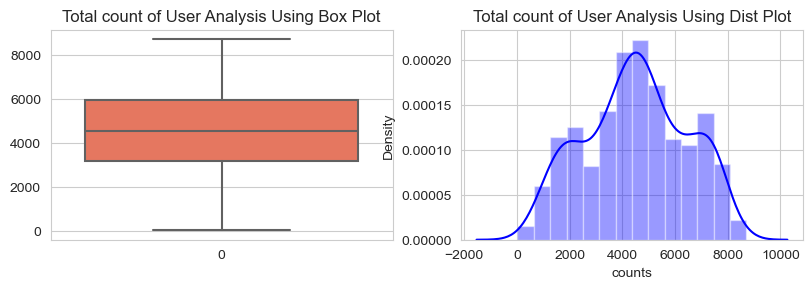

In [417]:
# Total user Analysis 

plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('Total count of User Analysis Using Box Plot')
sns.boxplot(daysData.counts , palette = 'Reds')

plt.subplot(2,3,2)
plt.title('Total count of User Analysis Using Dist Plot')
sns.distplot(daysData.counts , color = 'b')
plt.show()

In [418]:
daysData['counts'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: counts, dtype: float64

#### we also drop casual and registered users as our Taget variable is a sum of both.

In [419]:
daysData = daysData.drop(['casual','registered'] , axis = 1)

In [420]:
daysData.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,counts
0,1,01-01-2018,spring,2018,January,No,Monday,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,2018,January,No,Tuesday,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,2018,January,No,Wenesday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,2018,January,No,Thrusday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,2018,January,No,Friday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


In [421]:
daysData.shape

(730, 14)

<H2> <u> 2.1.2  BIVARIATE ANALYSIS </U> </H2>

<h4>Categorical data Analysis keeping daysData['counts'] as Target variable</h4>

<H3> <U> Seasons </U></H3>

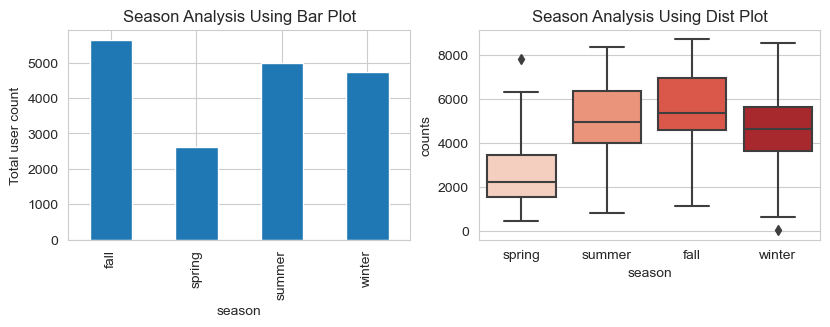

In [422]:
# Season Analysis 

plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('Season Analysis Using Bar Plot')
plt.ylabel('Total user count')
daysData.groupby('season')['counts'].mean().plot.bar()

plt.subplot(2,3,2)
plt.title('Season Analysis Using Dist Plot')
sns.boxplot(x = daysData.season, y = daysData.counts , palette = 'Reds')
plt.show()

##### INSIGHTS -- 
Maximum people renting bikes in <b> Fall Season </b> fallowed by summer then winter and spring.

### <u> Year </u>

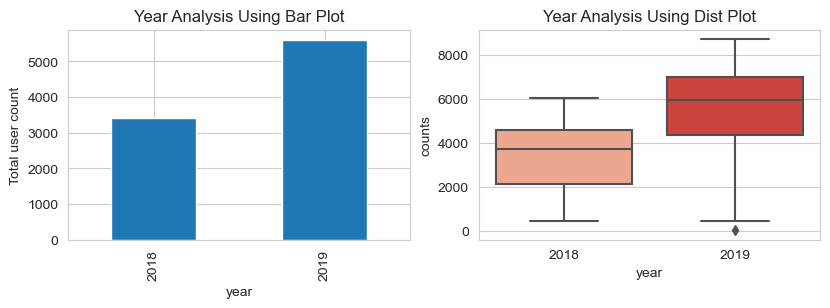

In [423]:
# Year Analysis 

plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('Year Analysis Using Bar Plot')
plt.ylabel('Total user count')
daysData.groupby('year')['counts'].mean().plot.bar()

plt.subplot(2,3,2)
plt.title('Year Analysis Using Dist Plot')
sns.boxplot(x = daysData.year, y = daysData.counts , palette = 'Reds')
plt.show()

##### INSIGHTS -- 
Maximum people renting bikes in the Year<b> 2019 </b> as compared to 2018

### <u> Month </u>

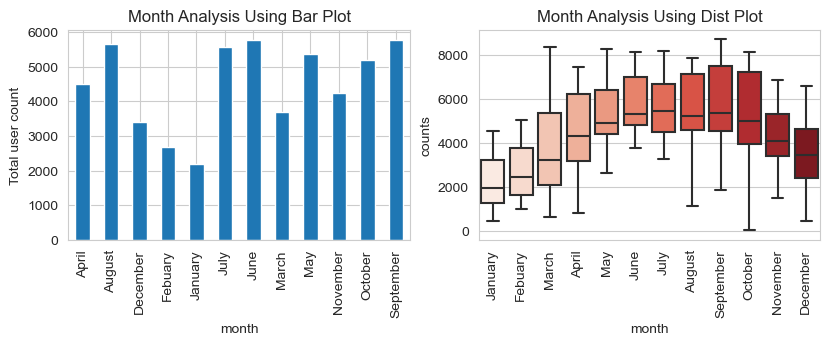

In [424]:
# Month Analysis 

plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('Month Analysis Using Bar Plot')
plt.ylabel('Total user count')
daysData.groupby('month')['counts'].mean().plot.bar()

plt.subplot(2,3,2)
plt.title('Month Analysis Using Dist Plot')
sns.boxplot(x = daysData.month, y = daysData.counts , palette = 'Reds')
plt.xticks(rotation = 90)
plt.show()

##### INSIGHTS -- 
Maximum people renting bikes in the month of <b> June ,July, August , September </b>.
Very less people rents bikes in the month of <b> January , Febuary ,December </b>

### <u> Holiday </u>

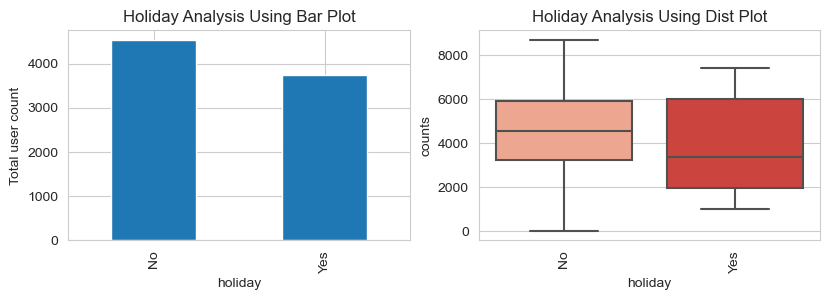

In [425]:
# Holiday Analysis 

plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('Holiday Analysis Using Bar Plot')
plt.ylabel('Total user count')
daysData.groupby('holiday')['counts'].mean().plot.bar()

plt.subplot(2,3,2)
plt.title('Holiday Analysis Using Dist Plot')
sns.boxplot(x = daysData.holiday, y = daysData.counts , palette = 'Reds')
plt.xticks(rotation = 90)
plt.show()

##### INSIGHTS --
Less people rents bikes on <b> Holidays </b>

### <u> WeekDays </u>

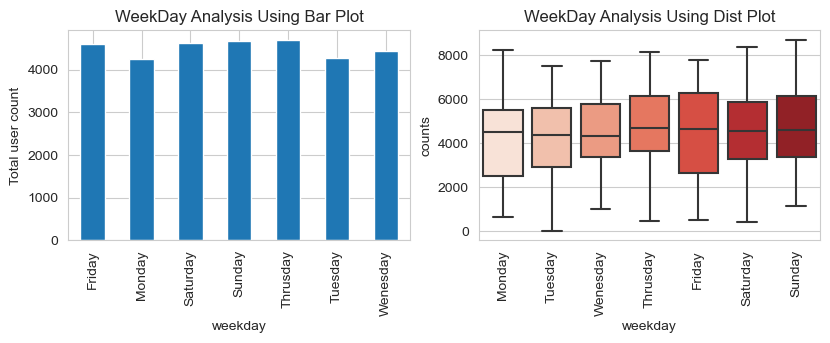

In [426]:
# WeekDay Analysis 

plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('WeekDay Analysis Using Bar Plot')
plt.ylabel('Total user count')
daysData.groupby('weekday')['counts'].mean().plot.bar()

plt.subplot(2,3,2)
plt.title('WeekDay Analysis Using Dist Plot')
sns.boxplot(x = daysData.weekday, y = daysData.counts , palette = 'Reds')
plt.xticks(rotation = 90)
plt.show()

##### INSIGHTS --
<b> Weekdays does not affect the renting bikes Counts.As all are somewhat equal in scale  </b>

### <u> Working Days </u>

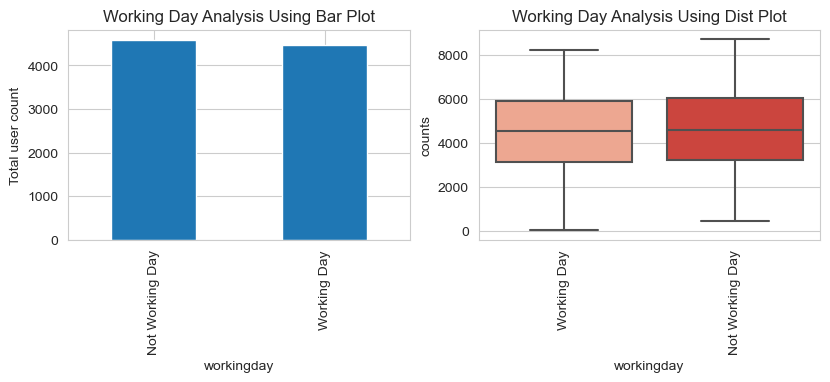

In [427]:
# Working Days Analysis 

plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('Working Day Analysis Using Bar Plot')
plt.ylabel('Total user count')
daysData.groupby('workingday')['counts'].mean().plot.bar()

plt.subplot(2,3,2)
plt.title('Working Day Analysis Using Dist Plot')
sns.boxplot(x = daysData.workingday, y = daysData.counts , palette = 'Reds')
plt.xticks(rotation = 90)
plt.show()

##### INSIGHTS --
<b> Working Day does not affect the renting bikes Counts.As all are somewhat equal in scale  </b>

### <u> Weather Conditions </u>

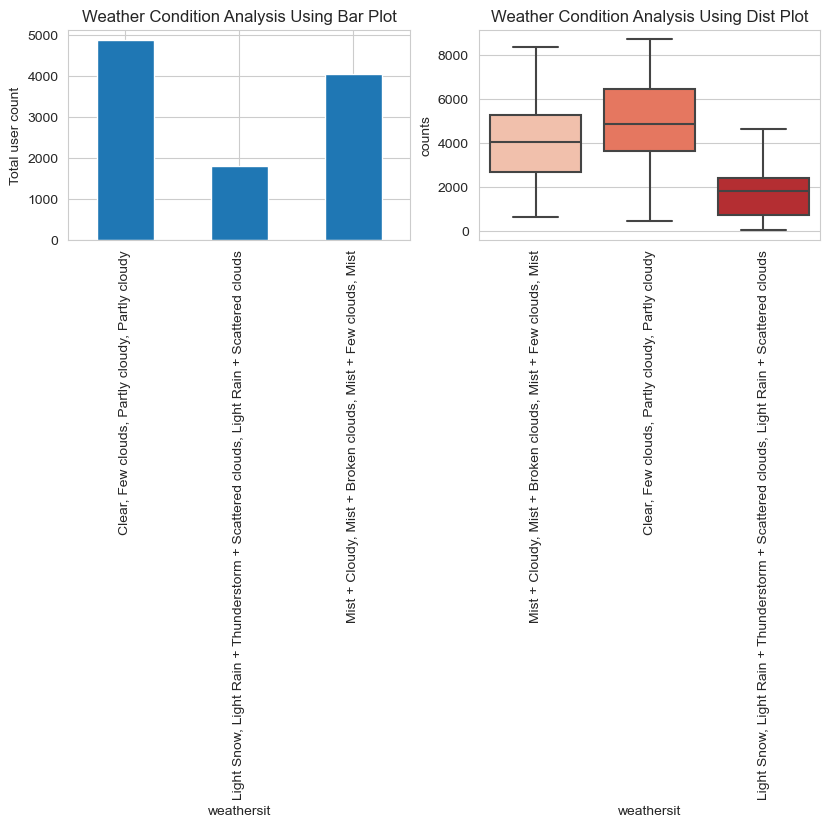

In [428]:
# Weather Condition Analysis 

plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('Weather Condition Analysis Using Bar Plot')
plt.ylabel('Total user count')
daysData.groupby('weathersit')['counts'].mean().plot.bar()

plt.subplot(2,3,2)
plt.title('Weather Condition Analysis Using Dist Plot')
sns.boxplot(x = daysData.weathersit, y = daysData.counts , palette = 'Reds')
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS -- 
People likes to rent bikes when the weather condition is <b> Clear, Few clouds, Partly cloudy.</b>
Also when the weather is <b> Mist, Cloudy, Broken clouds, or Few clouds .</b> people likes to rent bikes.

<H2> <u>2.1.3  MULTIVARIATE ANALYSIS </U> </H2>

In [429]:
# seperate out numerical and categorical variable for easiness.
numeric_vars_list = [ 'temperature','feeling_temperature','humidity','windspeed', 'counts']
categorical_vars_list = ['season', 'year', 'month', 'holiday', 'weekday', 'weathersit']

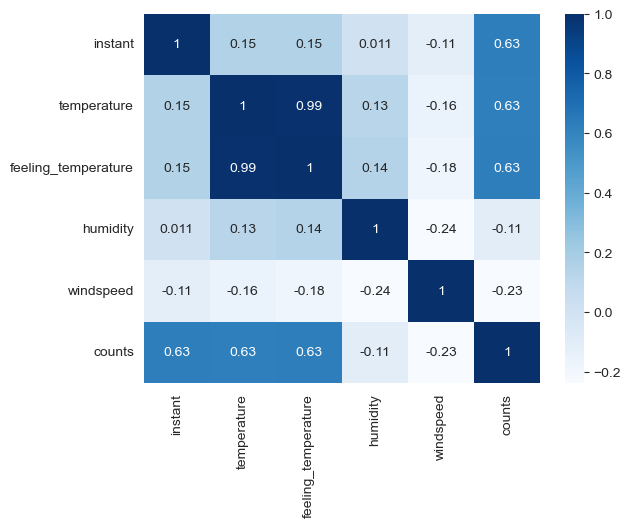

In [430]:
# Heatmap of all numerical values
sns.heatmap(daysData.corr(),annot = True , cmap = 'Blues')
plt.show()

<Figure size 2000x800 with 0 Axes>

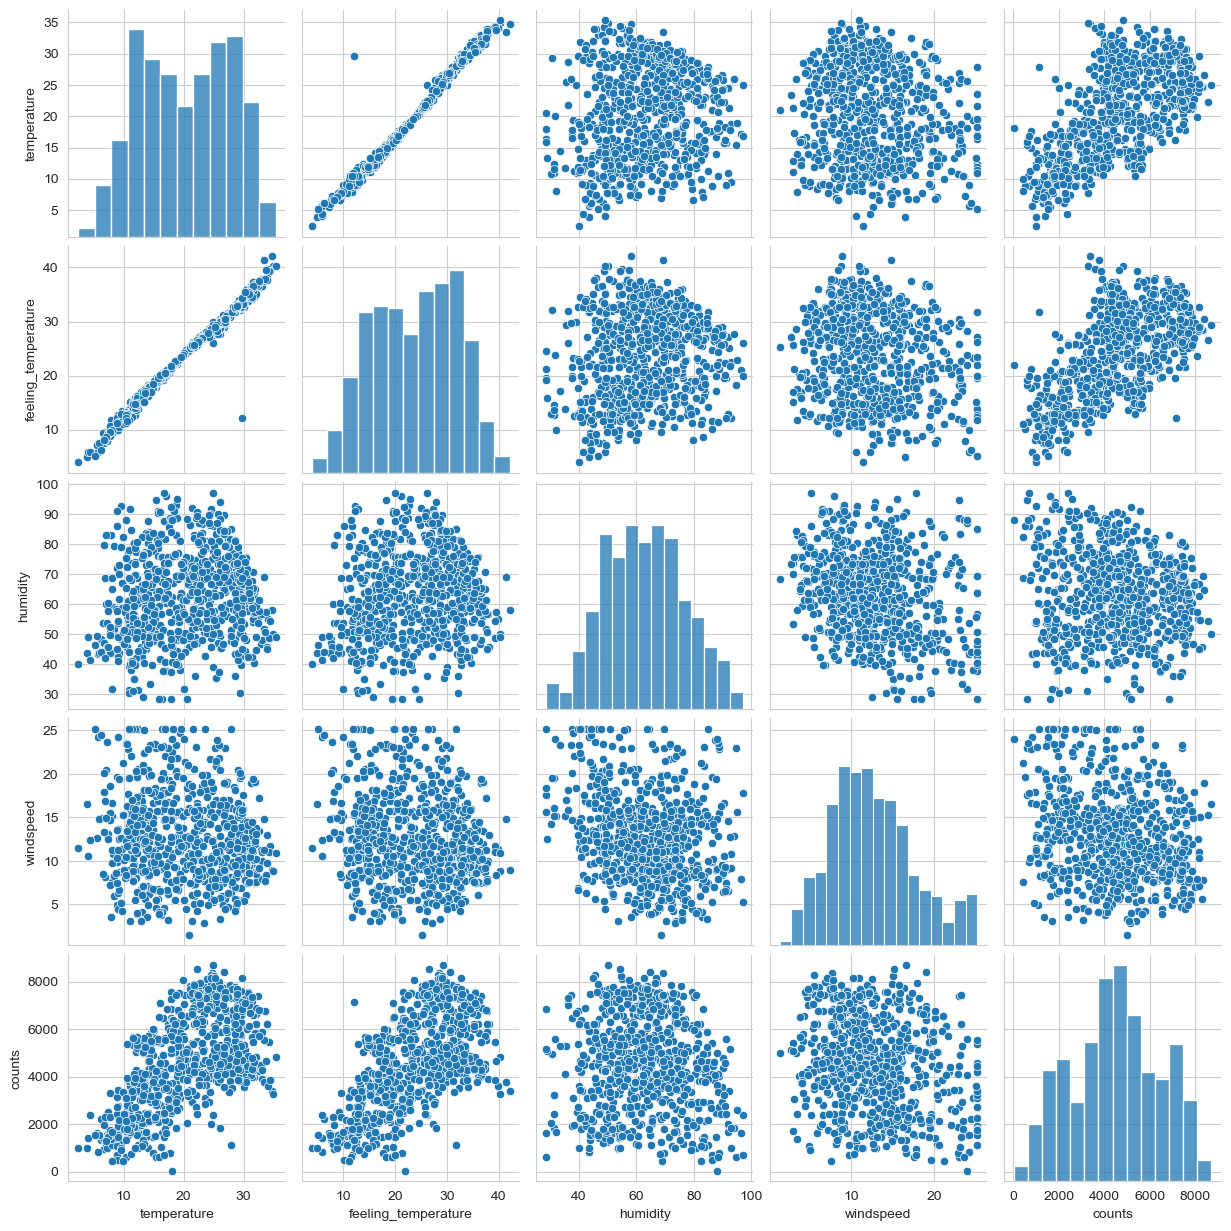

In [431]:
plt.figure(figsize=(20,8))
sns.pairplot(daysData[numeric_vars_list])
plt.show()

#### INSIGHTS -- 
We can see temperature and feeling temperature are <b> highly corelated </b>so we can drop any one of then it won't effect our analysis.
Moreover temperature is having good corelation with <b>Counts, windspeed, humidity. </b>

In [432]:
daysData = daysData.drop('feeling_temperature' , axis = 1 )

#### We also drop date coloumn ie dteday , as we already have the data in Month,Day,Year variables.

In [433]:
daysData = daysData.drop('date' , axis = 1 )

#### We also drop instant coloumn as it is acting as index only

In [434]:
daysData = daysData.drop('instant' , axis = 1 )

In [435]:
daysData.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,counts
0,spring,2018,January,No,Monday,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,985
1,spring,2018,January,No,Tuesday,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,801
2,spring,2018,January,No,Wenesday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,1349
3,spring,2018,January,No,Thrusday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,1562
4,spring,2018,January,No,Friday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,1600


In [436]:
daysData.shape

(730, 11)

So finally our data is ready for model building and we did a good EDA on the data.

## Step 3 : DATA PREPARATION

In [437]:
# Mapping values with numeric number ,creating dummies if required, checking for null values

In [438]:
daysData.isnull().sum()

season         0
year           0
month          0
holiday        0
weekday        0
workingday     0
weathersit     0
temperature    0
humidity       0
windspeed      0
counts         0
dtype: int64

#### INSIGHTS --
Data is not having any <b> Null Values </b>

#### <u> SEASON </u>

In [439]:
daysData['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [440]:
# mapping values - season : season (1:spring, 2:summer, 3:fall, 4:winter)
daysData['season'] = daysData['season'].map({'spring' :1,'summer':2,'fall':3,'winter':4})
daysData['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [441]:
# creating dummy variables for season
sea = pd.get_dummies(daysData['season'])

In [442]:
#Dropping first column using principle for n levels we require (n-1) dummy variables.
sea = pd.get_dummies(daysData['season'],drop_first = True)

In [443]:
season = pd.DataFrame(sea)
season.columns = ['summer','fall','winter']
season

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


In [444]:
# concat with daysData
daysData = pd.concat([daysData,season],axis =1)

In [445]:
#now dropping season variable from daysData
daysData = daysData.drop('season' , axis = 1)

In [446]:
daysData.head()

,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,counts,summer,fall,winter
0,2018,January,No,Monday,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,985,0,0,0
1,2018,January,No,Tuesday,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,801,0,0,0
2,2018,January,No,Wenesday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,1349,0,0,0
3,2018,January,No,Thrusday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,1562,0,0,0
4,2018,January,No,Friday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,1600,0,0,0


#### <u> YEAR </u>

In [447]:
daysData['year'].value_counts()

2018    365
2019    365
Name: year, dtype: int64

In [448]:
# mapping values - yr : year (0: 2018, 1:2019)
daysData['year'] = daysData['year'].map({'2018' :0,'2019':1})
daysData['year'].value_counts()

0    365
1    365
Name: year, dtype: int64

#### <u> Month </u>

In [449]:
daysData['month'].value_counts()

January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
Febuary      56
Name: month, dtype: int64

In [450]:
# creating dummy variables for season
mnth = pd.get_dummies(daysData['month'])

In [451]:
#Dropping first column using principle for n levels we require (n-1) dummy variables.
mnth = pd.get_dummies(daysData['month'],drop_first = True)

In [452]:
mnth

,August,December,Febuary,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [453]:
# concat with daysData
daysData = pd.concat([daysData,mnth],axis =1)

In [454]:
#now dropping season variable from daysData
daysData = daysData.drop('month' , axis = 1)

#### <u> Holiday </u>

In [455]:
daysData['holiday'].value_counts()

No     709
Yes     21
Name: holiday, dtype: int64

In [456]:
# mapping values- holiday : weather day is a holiday or not 
daysData['holiday'] = daysData['holiday'].map({'Yes' : 1 ,'No' : 0 })
daysData['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

#### <u> WeekDay </u>

In [457]:
daysData['weekday'].value_counts()

Monday      105
Tuesday     105
Wenesday    104
Thrusday    104
Friday      104
Saturday    104
Sunday      104
Name: weekday, dtype: int64

In [458]:
# creating dummy variables for season
wekday = pd.get_dummies(daysData['weekday'],drop_first = True)

In [459]:
# concat with daysData
daysData = pd.concat([daysData,wekday],axis =1)

In [460]:
#now dropping season variable from daysData
daysData = daysData.drop('weekday' , axis = 1)

#### <u> WorkingDay </u>

In [461]:
daysData['workingday'].value_counts()

Working Day        504
Not Working Day    226
Name: workingday, dtype: int64

In [462]:
# mapping values - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
daysData['workingday'] = daysData['workingday'].map({'Working Day' : 1 ,'Not Working Day' : 0 })
daysData['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

#### <u> Weather Situtation </u>

In [463]:
daysData['weathersit'].value_counts()

Clear, Few clouds, Partly cloudy, Partly cloudy                                            463
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               246
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     21
Name: weathersit, dtype: int64

In [464]:
# creating dummy variables for Weather
wether = pd.get_dummies(daysData['weathersit'],drop_first = True)

In [465]:
weather = pd.DataFrame(wether)

In [466]:
weather.columns =['mist','light_scattered_clouds']

In [467]:
# concat with daysData
daysData = pd.concat([daysData,weather],axis =1)

In [468]:
#now dropping season variable from daysData
daysData = daysData.drop('weathersit' , axis = 1)

In [469]:
daysData.head()

,year,holiday,workingday,temperature,humidity,windspeed,counts,summer,fall,winter,...,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wenesday,mist,light_scattered_clouds
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [470]:
daysData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temperature             730 non-null    float64
 4   humidity                730 non-null    float64
 5   windspeed               730 non-null    float64
 6   counts                  730 non-null    int64  
 7   summer                  730 non-null    uint8  
 8   fall                    730 non-null    uint8  
 9   winter                  730 non-null    uint8  
 10  August                  730 non-null    uint8  
 11  December                730 non-null    uint8  
 12  Febuary                 730 non-null    uint8  
 13  January                 730 non-null    uint8  
 14  July                    730 non-null    ui

In [471]:
# Total number of columns created
len(daysData.columns)

29

In [472]:
# Shape of our data
daysData.shape

(730, 29)

#### INSIGHTS : We are ready with our data for building data models on them.

# Step -4 Splitting the Data and create Training and testing sets

In [473]:
# splitting data in train and test set
train_X,test_X = train_test_split(daysData,train_size = 0.7 , test_size = 0.3 ,random_state = 100 )

In [474]:
print(train_X.shape)
print(test_X.shape)

(510, 29)
(219, 29)


In [475]:
# we apply scaling before processing further
# creating object for MinMaxClass 
scaler = MinMaxScaler()

In [476]:
# we have to apply scaling on numerical values except dummy vals,0's and 1's i,e Yes/No type
# create a list
var_list = ['temperature','humidity','windspeed','counts']

In [477]:
# applying fit_transform() of MinMaxScaler for Scaling the train set
train_X[var_list] = scaler.fit_transform(train_X[var_list])

In [478]:
#reading values after scaling
train_X.head()

,year,holiday,workingday,temperature,humidity,windspeed,counts,summer,fall,winter,...,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wenesday,mist,light_scattered_clouds
653,1,0,1,0.509887,0.398809,0.419114,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.611567,0.368802,0.827658,0,1,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.490599,0.355784,0.465255,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.289391,0.923946,0.204096,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.298510,0.262614,0.482973,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [479]:
train_X.describe()

,year,holiday,workingday,temperature,humidity,windspeed,counts,summer,fall,winter,...,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wenesday,mist,light_scattered_clouds
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.506131,0.444311,0.513620,0.245098,0.262745,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.202836,0.229164,0.224593,0.430568,0.440557,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.346836,0.277528,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.509747,0.413498,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.652902,0.577474,0.684710,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


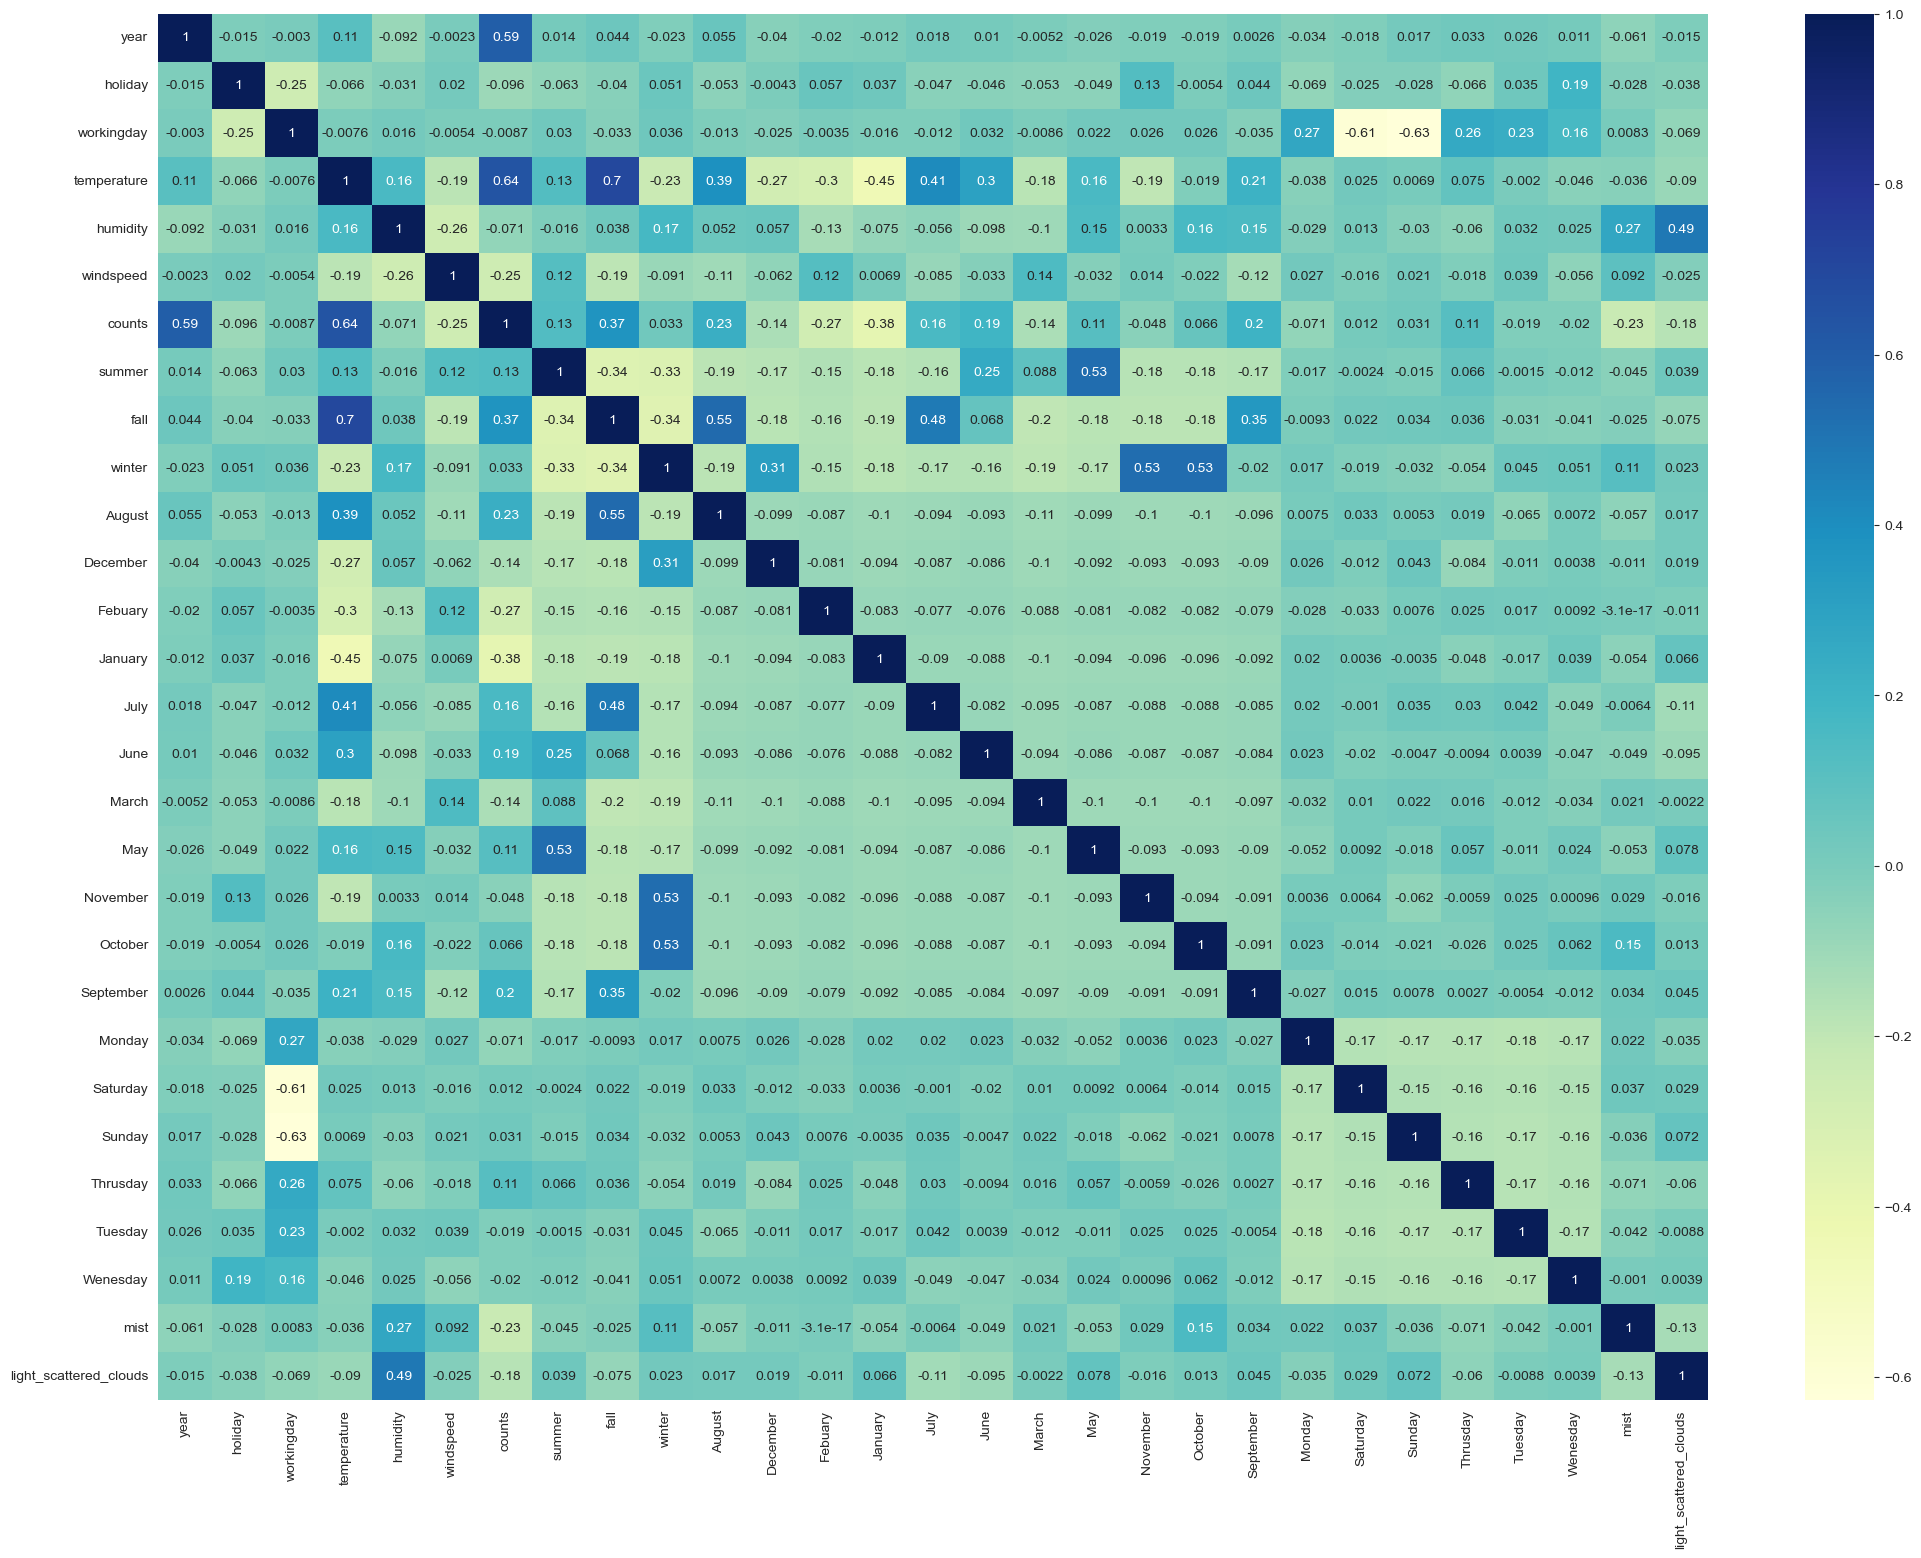

In [480]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 18))
sns.heatmap(train_X.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### We can see all data's are min at 0  and max at 1 range.

## Dividing dataset into X and Y set

In [481]:
#dividing values of X,y
X_train = train_X
y_train = train_X.pop('counts')

In [482]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,step = 15) # We are selecting the top 20 features from the set of 29
rfe = rfe.fit(X_train, y_train)

In [483]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 2),
 ('winter', True, 1),
 ('August', False, 2),
 ('December', False, 2),
 ('Febuary', False, 2),
 ('January', True, 1),
 ('July', False, 2),
 ('June', False, 2),
 ('March', False, 2),
 ('May', False, 2),
 ('November', False, 2),
 ('October', False, 2),
 ('September', True, 1),
 ('Monday', False, 2),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thrusday', False, 2),
 ('Tuesday', False, 2),
 ('Wenesday', False, 2),
 ('mist', True, 1),
 ('light_scattered_clouds', True, 1)]

In [484]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temperature', 'humidity', 'windspeed',
       'summer', 'winter', 'January', 'September', 'Saturday', 'Sunday',
       'mist', 'light_scattered_clouds'],
      dtype='object')

In [485]:
X_train.columns[~rfe.support_]

Index(['fall', 'August', 'December', 'Febuary', 'July', 'June', 'March', 'May',
       'November', 'October', 'Monday', 'Thrusday', 'Tuesday', 'Wenesday'],
      dtype='object')

# Step - 5  Building model using statsmodel, for the detailed statistics

#### <u > First Model </u>

In [486]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [487]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [488]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.2
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          6.40e-187
Time:                        15:56:19   Log-Likelihood:                 506.54
No. Observations:                 510   AIC:                            -983.1
Df Residuals:                     495   BIC:                            -919.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [489]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,343.08
3,workingday,64.36
12,Sunday,36.91
11,Saturday,35.12
2,holiday,6.60
5,humidity,1.96
4,temperature,1.72
14,light_scattered_clouds,1.61
9,January,1.55
8,winter,1.51


#### `Sunday` is insignificant in presence of other variables and it's p-value is high; can be dropped

In [490]:
X_train_new = X_train_rfe.drop(["Sunday"], axis = 1)

In [491]:
X_train_new.shape

(510, 14)

#### Rebuilding the model without `Sunday`

#### <u > Second Model </u>

In [492]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [493]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.9
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          4.95e-188
Time:                        15:56:19   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     496   BIC:                            -925.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [494]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,35.38
5,humidity,1.96
3,workingday,1.81
4,temperature,1.72
11,Saturday,1.68
13,light_scattered_clouds,1.61
9,January,1.55
8,winter,1.50
12,mist,1.29
7,summer,1.28


#### `Saturday` is insignificant in presence of other variables and it's p-value is high; can be dropped

In [495]:
X_train_new = X_train_new.drop(["Saturday"], axis = 1)

In [496]:
X_train_new.shape

(510, 13)

#### Rebuilding the model without `Saturday`

#### <u > Third Model </u>

In [497]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [498]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     218.0
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          3.51e-189
Time:                        15:56:19   Log-Likelihood:                 506.35
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     497   BIC:                            -931.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [499]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,32.00
5,humidity,1.96
4,temperature,1.72
12,light_scattered_clouds,1.61
9,January,1.54
8,winter,1.50
11,mist,1.29
7,summer,1.28
6,windspeed,1.19
10,September,1.12


In [500]:
X_train_new.columns

Index(['const', 'year', 'holiday', 'workingday', 'temperature', 'humidity',
       'windspeed', 'summer', 'winter', 'January', 'September', 'mist',
       'light_scattered_clouds'],
      dtype='object')

In [501]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [502]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,humidity,11.58
3,temperature,7.91
5,windspeed,3.63
2,workingday,3.48
11,light_scattered_clouds,2.43
0,year,2.05
7,winter,1.80
6,summer,1.67
8,January,1.40
10,mist,1.29


#### After dropping const  , temperature and humidity suddenly increased and have a very high VIF (i,e high Multicollinearity), Hence I remove humidity first and then check VIF and p-value of the model


In [503]:
# dropping humidity
X_train_new = X_train_new.drop(['humidity'], axis=1)

#### Rebuilding the model without `Humidity`

In [504]:
# Adding a constant variable 
X_train_lm_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm_new).fit()   # Running the linear model

In [505]:
# studying all parameters of model
lm.params

const                     0.168661
year                      0.233548
holiday                  -0.113928
workingday               -0.021774
temperature               0.518857
windspeed                -0.117426
summer                    0.081277
winter                    0.120982
January                  -0.044150
September                 0.098807
mist                     -0.285678
light_scattered_clouds   -0.080221
dtype: float64

In [506]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     227.9
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          2.36e-186
Time:                        15:56:19   Log-Likelihood:                 496.82
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     498   BIC:                            -918.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [507]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.17
4,temperature,1.61
8,January,1.54
7,winter,1.44
6,summer,1.28
9,September,1.11
5,windspeed,1.10
2,holiday,1.09
3,workingday,1.08
10,mist,1.05


In [508]:
# dropping constant variable 
X_train_lm_new = X_train_lm_new.drop(['const'], axis=1)

In [509]:
# Calculate the VIFs for the new model without constant
vif = pd.DataFrame()
X = X_train_lm_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temperature,4.53
4,windspeed,3.63
2,workingday,3.32
0,year,2.04
5,summer,1.64
10,light_scattered_clouds,1.53
6,winter,1.52
7,January,1.28
8,September,1.21
1,holiday,1.10


<Axes: >

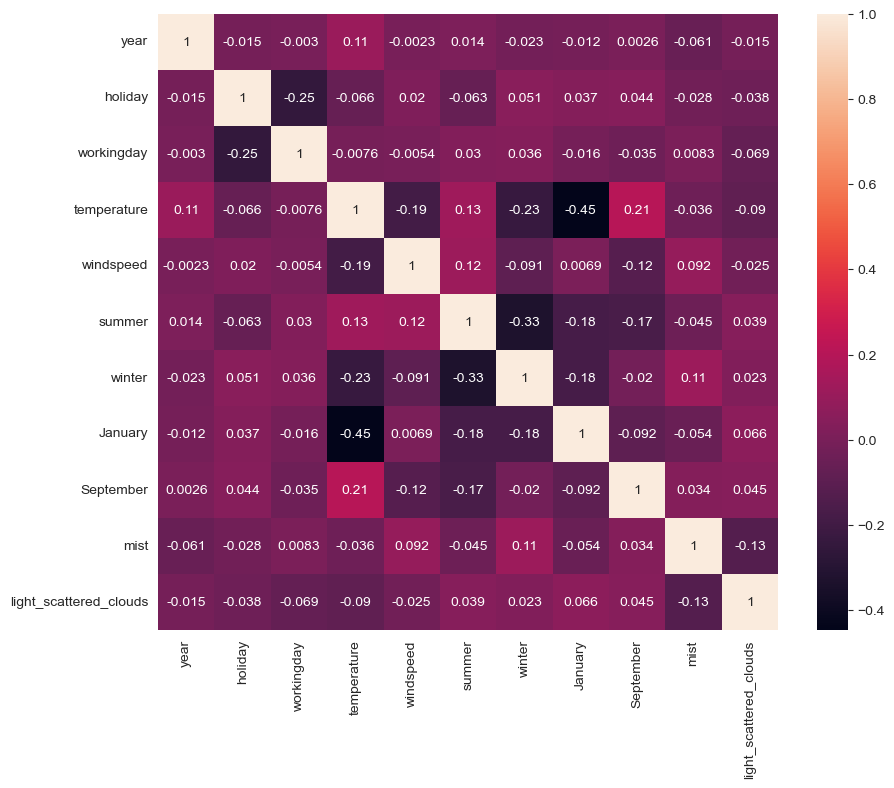

In [510]:
# finding variance with respect to each other using Heatmap.
plt.figure(figsize=(10,8))
sns.heatmap(X_train_lm_new.corr(), annot=True)

#### INSIGHTS:--

<b>
1. We have Prob(F-statistic) is very low Which tells Overall model is a good Fit </br>
2. We got quite Good Adjusted R2 Score i.e 83.1%</br>
3.All the P Value are less than 0.05, Which say that all the 11 Features are Statistically Significant</br>
4.Hence we can go ahaed with the current Model for Prediction and Evaluation.</br>
</b>

# Step-6 Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [511]:
# Predict on train dataset
X_train_new_sm = sm.add_constant(X_train_lm_new) # add constant
y_train_predict = lm.predict(X_train_new_sm)
res = y_train - y_train_predict

#### Analyzing for the Assumption : Normality

Text(0.5, 0, 'Errors')

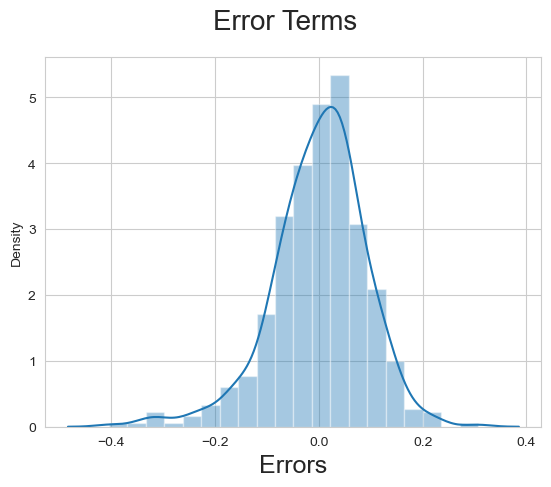

In [512]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### As we can see that the error terms are normally distributed, we can say that our assumption is correct and our model is good.

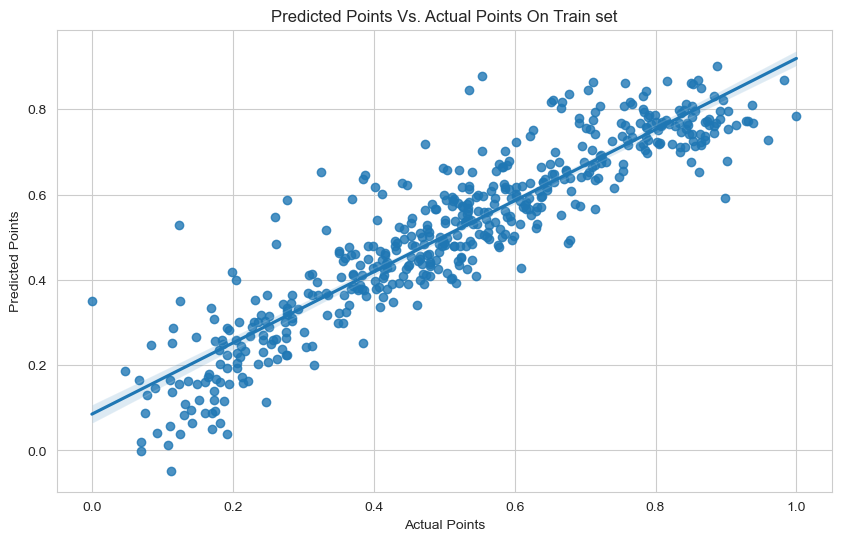

In [513]:
# Analyzing for Constant variance
plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
sns.regplot(x=y_train, y=y_train_predict)
plt.title('Predicted Points Vs. Actual Points On Train set')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

#### We can see Error Terms have approximatly a Constant Variance, Hence it follows the Assumption of Homoscedasticity

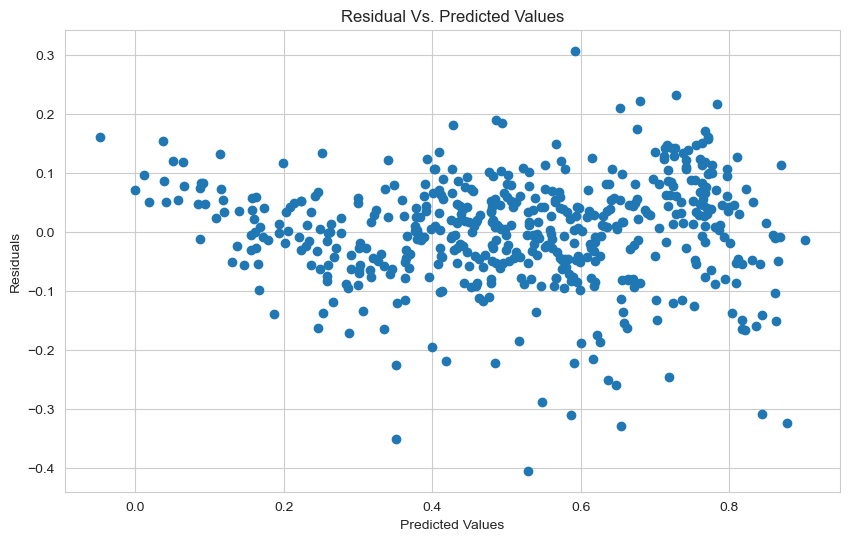

In [514]:
# Analyzing patterns in residuals
plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
plt.scatter(y_train_predict,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### We can see there is no specific Pattern observed in the Error Terms with respect to Prediction, hence we can say Error terms are independent of each other.

In [515]:
# check the sum of error terms
sum((y_train - y_train_predict))

-5.180023077144824e-13

In [516]:
# r2 score for train dataset
r2_score(y_train,  y_train_predict)

0.8342555855101025

In [517]:
# final columns are
X_train_lm.columns

Index(['const', 'year', 'holiday', 'workingday', 'temperature', 'humidity',
       'windspeed', 'summer', 'winter', 'January', 'September', 'mist',
       'light_scattered_clouds'],
      dtype='object')

# Step - 7 Making Predictions

#### Applying the scaling on the test sets

In [518]:
test_X.head()

,year,holiday,workingday,temperature,humidity,windspeed,counts,summer,fall,winter,...,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wenesday,mist,light_scattered_clouds
184,0,1,0,29.793347,63.7917,5.459106,6043,0,1,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [519]:
var_list = ['temperature','humidity','windspeed','counts']

test_X[var_list] = scaler.transform(test_X[var_list])

#### Dividing into X_test and y_test

In [520]:
y_test = test_X.pop('counts')
X_test = test_X

In [521]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [522]:
X_test_new.head()

,const,year,holiday,workingday,temperature,windspeed,summer,winter,January,September,mist,light_scattered_clouds
184,1.0,0,1,0,0.831783,0.117347,0,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.214198,1,0,0,0,0,0
299,1.0,0,0,0,0.511964,0.465669,0,1,0,0,0,1
221,1.0,0,0,1,0.881625,0.473143,0,0,0,0,0,0
152,1.0,0,0,0,0.817246,0.748811,1,0,0,0,0,0


In [523]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

In [524]:
print('R2 score for test dataset: ', r2_score(y_test, y_test_pred))
print('R2 score for train dataset: ',r2_score(y_train, y_train_predict))

R2 score for test dataset:  0.7942857066042976
R2 score for train dataset:  0.8342555855101025


# Step - 8  Model Evaluation

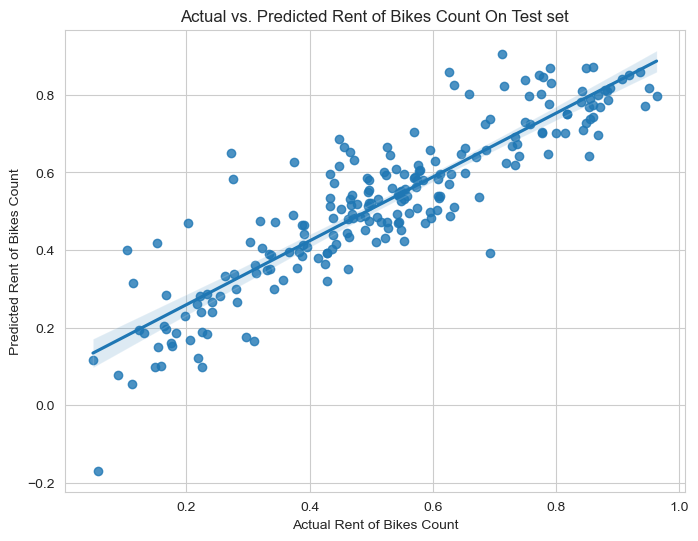

In [525]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (8,6))
sns.set_style("whitegrid")
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count On Test set')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

#### They are perfectly fitting in line between predicted and actual test.

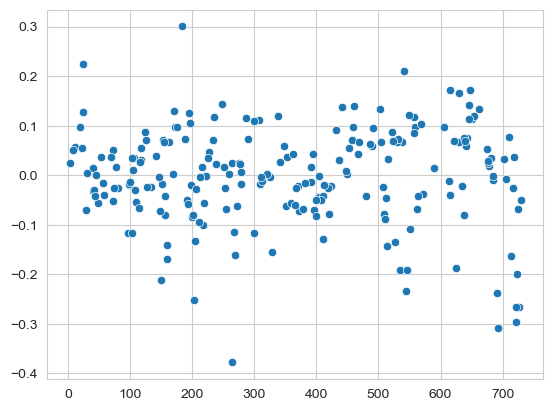

In [526]:
residuals = y_test-y_test_pred
sns.scatterplot(residuals)
plt.show()

#### As we can see residuals are properly distributed ,it is not accumalted at one point,that is errors are balanced.

### <u> Equation : </u>

In [527]:
Cofficients = round(lm.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temperature               0.52
year                      0.23
const                     0.17
winter                    0.12
September                 0.10
summer                    0.08
workingday               -0.02
January                  -0.04
light_scattered_clouds   -0.08
holiday                  -0.11
windspeed                -0.12
mist                     -0.29
dtype: float64

In [528]:
# Equation Of Line formed
for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

0.52 * temperature + 0.23 * year + 0.17 * const + 0.12 * winter + 0.1 * September + 0.08 * summer + -0.02 * workingday + -0.04 * January + -0.08 * light_scattered_clouds + -0.11 * holiday + -0.12 * windspeed + -0.29 * mist + 

# Step 9- KEY FINDINGS ON DATA

### 9.1 EQUATION: 

  counts = (0.17 * const) + (0.52 * temperature) + (0.23 * year)  + (0.12 * winter) + (0.1 * September) + (0.08 * summer) + (-0.02 * workingday) + (-0.04 * January) + (-0.08 * light_scattered_clouds) + (-0.11 * holiday) + (-0.12 * windspeed) + (-0.29 * mist )

## 9.2 INSIGHTS:

1.Temperature is the Most Significant Feature which affects the Business positively.</br>
2.Whereas  the other Environmental condition such as mist, Windspeed and light_scattered_clouds affects the Business negatively.</br>
3.Company need to think how to tackle with bad weather condition and come up with sort of solution which protect users from Raining.</br> 
4.The Demand of Bikes is more in the Winter and Summer season </br> 
5.Demand of Bike Rent has been significantly increased in the 2019 than 2018 so it is clear sign that Boom Bikes is doing a Business.</br> 


## 9.3 Top 5 variables that are affecting the count of rental bikes are: 

<b> 1. temperature : <u> 0.518857  </u></b></br>
<b> 2. year : <u> 0.233548  </u></b> </br>
<b> 3. Winter season : <u> 0.01210  </u></b></br> 
<b> 3. summer season : <u> 0.081277  </u></b>   
<b> 4. windspeed :  <u> -0.117426  </u></b>      
<b> 5. workingday: <u> -0.021774 </u></b></br>

## 9.4 R Squared Value : - </br>
<b> 1. On Training Model : <u> 0.8342   </u></b></br></br>
<b> 2. On Testing Model :  <u> 0.7942   </u></b></br>       
<b> 3. Prob (F-statistic): <u> 2.36e-186  </u></b> i,e approx 0 <br/></br>
<b> 4. Adj. R-squared of : <u> 0.831   </u></b><b>on Training Model</b>